## Reto 1: Bootstrap

### 1. Objetivos:
    - Practicar la aplicación del algoritmo de boostrap
    - Practicar graficar los resultados del boostrap
 
---
    
### 2. Desarrollo:

En este Reto vamos a aplicar la técnica de bootstrap para explorar distribuciones muestrales de estadísticas. Para este Reto puedes elegir cualquiera de los datasets que vienen incluidos en este módulo. Ha llegado el momento de que te dejes guiar por tu curiosidad. Puedes ver una lista de todo lo que hay disponible [acá](../../Datasets/Readme.md).

Elige un dataset que tenga alguna variable numérica que te parezca interesante. Ahora, vamos a realizar algunos análisis sobre esa variable. Recuerda escribir tu análisis de manera ordenada, ya que si lo deseas habrá oportunidad de presentar tus hallazgos al grupo. Lleva a cabo los siguientes pasos:

1. Primero saca tus estimados de locación y dispersión.
2. Después, grafica tu variable usando un histograma y un boxplot, para que tengas una idea más detallada de su distribución.
3. Si consideras que hay valores atípicos, lidia con ellos de la manera que te parezca más adecuada.
4. Ahora vamos a ver qué tanta incertidumbre y sesgo hay en tus hallazgos. Vamos a aplicar la técnica de bootstrap 3 veces:

  a) Realiza 100 000 remuestreos, cada uno de 5 elementos. Obtén la medida estadística que te interese de cada muestra y guarda los resultados en una lista.
  
  b) Repite el mismo proceso, pero esta vez con remuestreos con longitud de 20% del total de los datos.
  
  c) Repite una vez más, pero esta vez cada nueva muestra tendrá una longitud de 90% de la original.
  
5. Grafica cada una de las listas resultantes en un histograma.
6. Obtén la asimetría y curtosis de cada una y compáralas entre ellas. ¿Cuál es más similar a una distribución normal? ¿Qué diferencias tienen entre ellas?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#analizaremos el dataset de objetos cercanos a la tierra
df = pd.read_csv('../../Datasets/near_earth_objects-jan_feb_1995-clean.csv', index_col=0)

df.head()

,id,name,is_potentially_hazardous_asteroid,estimated_diameter.meters.estimated_diameter_min,estimated_diameter.meters.estimated_diameter_max,close_approach_date,epoch_date_close_approach,orbiting_body,relative_velocity.kilometers_per_second,relative_velocity.kilometers_per_hour
0,2154652,154652 (2004 EP20),False,483.676488,1081.533507,1995-01-07,789467580000,Earth,16.142864,58114.308667
1,3153509,(2003 HM),True,96.506147,215.794305,1995-01-07,789491340000,Earth,12.351044,44463.757734
2,3516633,(2010 HA),False,44.111820,98.637028,1995-01-07,789446820000,Earth,6.220435,22393.567277
3,3837644,(2019 AY3),False,46.190746,103.285648,1995-01-07,789513900000,Earth,22.478615,80923.015021
4,3843493,(2019 PY),False,22.108281,49.435619,1995-01-07,789446700000,Earth,4.998691,17995.288355


In [8]:
#Analizamos la variable de relative_velocity.kilometers_per_hour
#observamos la desviacion estandar , media, promedio
print(df["relative_velocity.kilometers_per_hour"].std())
print(df["relative_velocity.kilometers_per_hour"].mean())
print(df["relative_velocity.kilometers_per_hour"].median())



28785.579082654276
53943.220487413935
51325.7970085319


<AxesSubplot:xlabel='relative_velocity.kilometers_per_hour'>

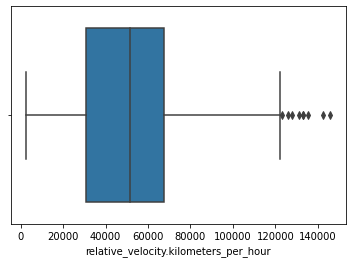

In [9]:
sns.boxplot(x=df["relative_velocity.kilometers_per_hour"])

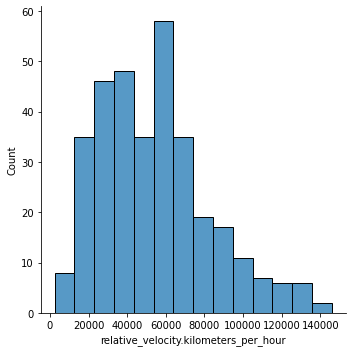

In [12]:
sns.displot(df["relative_velocity.kilometers_per_hour"])

In [13]:
#Elimino valores atipicos
iqr_velocity = df['relative_velocity.kilometers_per_hour'].quantile(0.75) - df['relative_velocity.kilometers_per_hour'].quantile(0.25)
filter_upper_outliers = df['relative_velocity.kilometers_per_hour'] < (df['relative_velocity.kilometers_per_hour'].quantile(0.75) + iqr_velocity * 1.5)
df_velocity_no_outliers = df[filter_upper_outliers]

<AxesSubplot:xlabel='relative_velocity.kilometers_per_hour'>

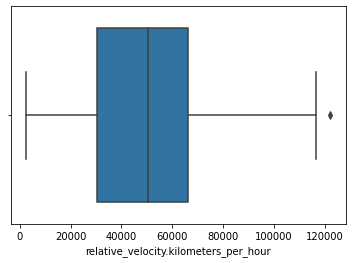

In [15]:
sns.boxplot(x=df_velocity_no_outliers["relative_velocity.kilometers_per_hour"])

In [16]:
velocity=df_velocity_no_outliers['relative_velocity.kilometers_per_hour']
means = []

for i in range(100_000):
    sample = velocity.sample(n=50, replace=True)
    means.append(sample.mean())
    
serie_means = pd.Series(means)

/home/migueltr/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


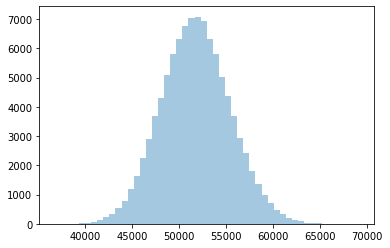

In [17]:
sns.distplot(serie_means, kde=False, norm_hist=False);

In [18]:
#skew
serie_means.skew()

0.07216717137980398

In [19]:
#kurtosis
serie_means.kurtosis()

-0.02576699395078652